In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 500
import seaborn as sns

### Загрузка данных

In [3]:
df = pd.read_excel('processed_segmentation.xlsx')

### PCA Анализ

In [4]:
X = df.drop('Segmentation',axis=1)
Y = df['Segmentation']

In [5]:
Y

,Segmentation
0,D
1,A
2,B
3,B
4,A
...,...
8063,D
8064,D
8065,D
8066,B


#### Центрируем данные

In [6]:
X = X.subtract(X.mean())
X.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,-21.466906,-1.641663,1.149877,0.452529,-0.592836,-0.625434,-0.154467,-0.134565,0.453874,-0.150719,0.395389,-0.017253,-0.144083,0.099973
1,-5.466906,0.000000,0.149877,-0.547471,0.407164,0.374566,0.040094,-0.136878,-0.029322,-0.150719,-0.604611,-0.017253,-0.144083,0.099973
2,23.533094,-1.641663,-1.850123,-0.547471,0.407164,0.374566,0.040094,-0.136878,-0.029322,-0.150719,0.395389,0.003994,0.041298,-0.032710
3,23.533094,-2.641663,-0.850123,0.452529,0.407164,0.374566,0.023319,-0.019455,-0.075653,0.849281,-0.604611,0.003994,0.041298,-0.032710
4,-3.466906,0.000000,3.149877,-0.547471,0.407164,0.374566,0.002584,-0.088221,-0.054556,0.849281,-0.604611,0.003994,0.041298,-0.032710


In [7]:
X.shape

(8068, 14)

#### Разложим все наши данные на 2 главные компоненты

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA_dataset = pca.fit_transform(X)
PCA_dataset

array([[-21.43286978,  -2.45871976],
       [ -5.45009721,  -0.18593691],
       [ 23.61220116,  -0.70438536],
       ...,
       [-10.36632897,  -1.86499497],
       [-16.43283336,  -2.26716623],
       [ -6.35248649,  -2.86190895]])

In [9]:
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])
PCA_dataset.head()

,PCA_1,PCA_2
0,-21.432870,-2.458720
1,-5.450097,-0.185937
2,23.612201,-0.704385
3,23.643254,-1.775789
4,-3.518230,-0.315505


#### Каково содержание изначальных признаков в 2-х компонентах

In [10]:
first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)
corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)
corrs.columns = ['PCA_1', 'PCA_2']
corrs

,PCA_1,PCA_2
Age,0.999976,0.006465
Work_Experience,-0.185781,0.982151
Family_Size,-0.274496,-0.140078
Gender_Male,0.030516,-0.055113
Ever_Married_Yes,0.557175,0.011474
Graduated_Yes,0.235837,0.082300
Profession_B,0.457619,0.080925
Profession_C,0.281130,0.034265
Profession_D,-0.454462,-0.076540
Spending_Score_High,0.360744,0.000941


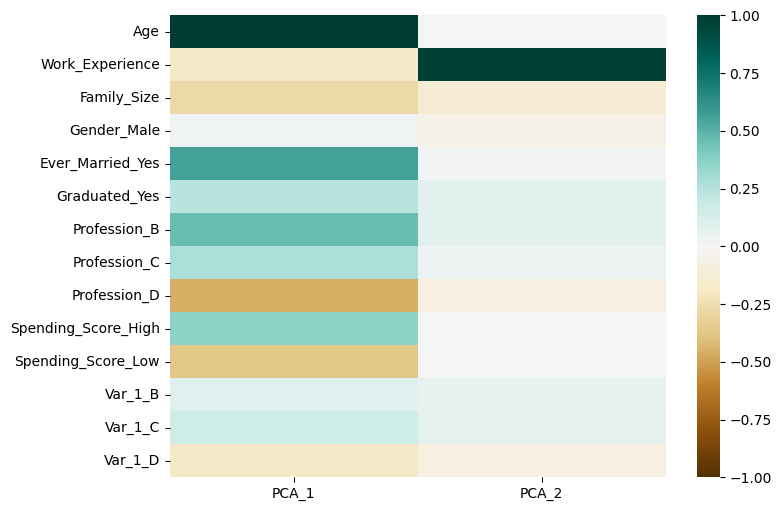

In [11]:
fig = plt.figure()
fig.set_size_inches(8, 6)
sns.heatmap(corrs,
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)
plt.show()

#### Создадим датафрейм из признаков и таргета

In [12]:
PCA_dataset = np.concatenate((PCA_dataset.values, Y.values.reshape(-1, 1)),
                              axis=1)
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'SEGMENT'])
PCA_dataset.head()

,PCA1,PCA2,SEGMENT
0,-21.43287,-2.45872,D
1,-5.450097,-0.185937,A
2,23.612201,-0.704385,B
3,23.643254,-1.775789,B
4,-3.51823,-0.315505,A


<Axes: xlabel='PCA1', ylabel='PCA2'>

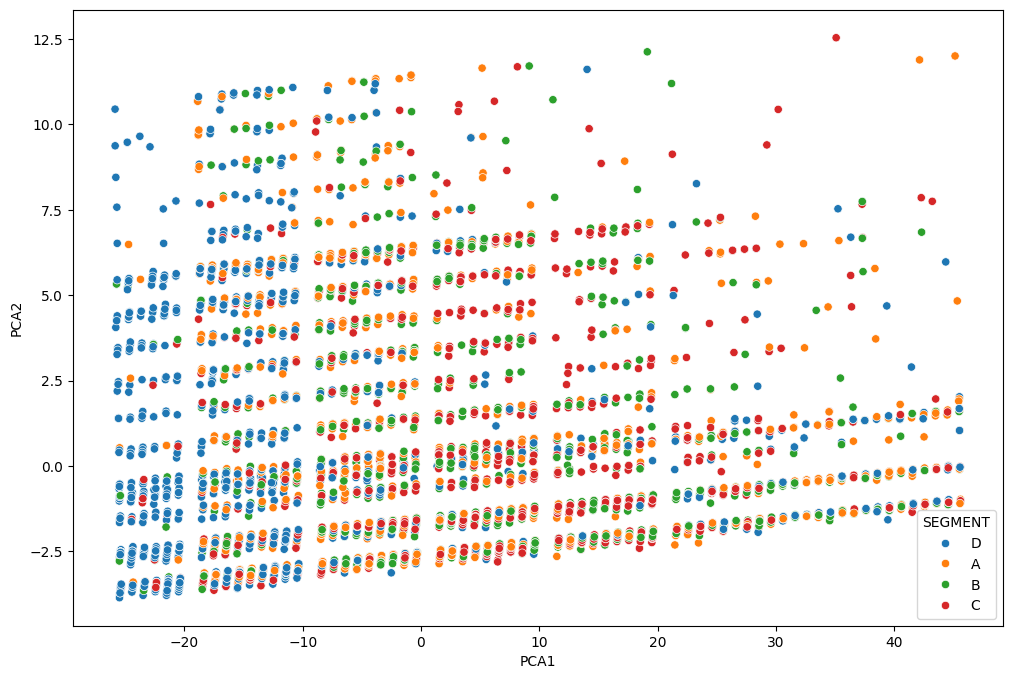

In [13]:
fig = plt.figure()
fig.set_size_inches(12, 8)
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="SEGMENT")

#### Разложим данные на 3 компоненты

In [14]:
pca_3d = PCA(n_components=3)
pca_3d.fit(X)
PCA_dataset_3d = pca_3d.transform(X)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])
PCA_dataset_3d.head()

,PCA_1,PCA_2,PCA_3
0,-21.432870,-2.458720,0.481023
1,-5.450097,-0.185937,0.037264
2,23.612201,-0.704385,-1.401751
3,23.643254,-1.775789,-0.327444
4,-3.518230,-0.315505,3.097162


#### Каково содержание изначальных признаков в 3-х компонентах

In [15]:
first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)
corrs_3d = pd.concat((first_component_corr_3d,
                      second_component_corr_3d,
                      third_component_corr_3d), axis=1)
corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']
corrs_3d

,PCA_1,PCA_2,PCA_3
Age,0.999976,0.006465,0.002189
Work_Experience,-0.185781,0.982151,0.029322
Family_Size,-0.274496,-0.140078,0.950478
Gender_Male,0.030516,-0.055113,0.069506
Ever_Married_Yes,0.557175,0.011474,0.105692
Graduated_Yes,0.235837,0.082300,-0.170059
Profession_B,0.457619,0.080925,-0.077093
Profession_C,0.281130,0.034265,-0.089120
Profession_D,-0.454462,-0.076540,0.110584
Spending_Score_High,0.360744,0.000941,0.166439


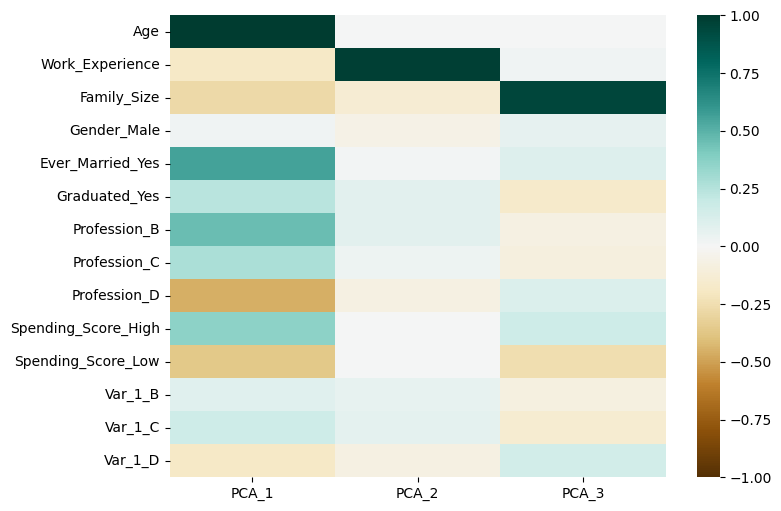

In [16]:
fig = plt.figure()
fig.set_size_inches(8, 6)
sns.heatmap(corrs_3d,
            xticklabels=corrs_3d.columns,
            yticklabels=corrs_3d.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)
plt.show()

#### Датафрейм из 3-х признаков и таргета

In [17]:
PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, Y.values.reshape(-1, 1)),
                                 axis=1)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'SEGMENT'])
PCA_dataset_3d

,PCA_1,PCA_2,PCA_3,SEGMENT
0,-21.43287,-2.45872,0.481023,D
1,-5.450097,-0.185937,0.037264,A
2,23.612201,-0.704385,-1.401751,B
3,23.643254,-1.775789,-0.327444,B
4,-3.51823,-0.315505,3.097162,A
...,...,...,...,...
8063,-21.465477,-3.649337,3.369814,D
8064,-8.516026,-0.018887,0.930946,D
8065,-10.366329,-1.864995,-2.292746,D
8066,-16.432833,-2.267166,0.524987,B


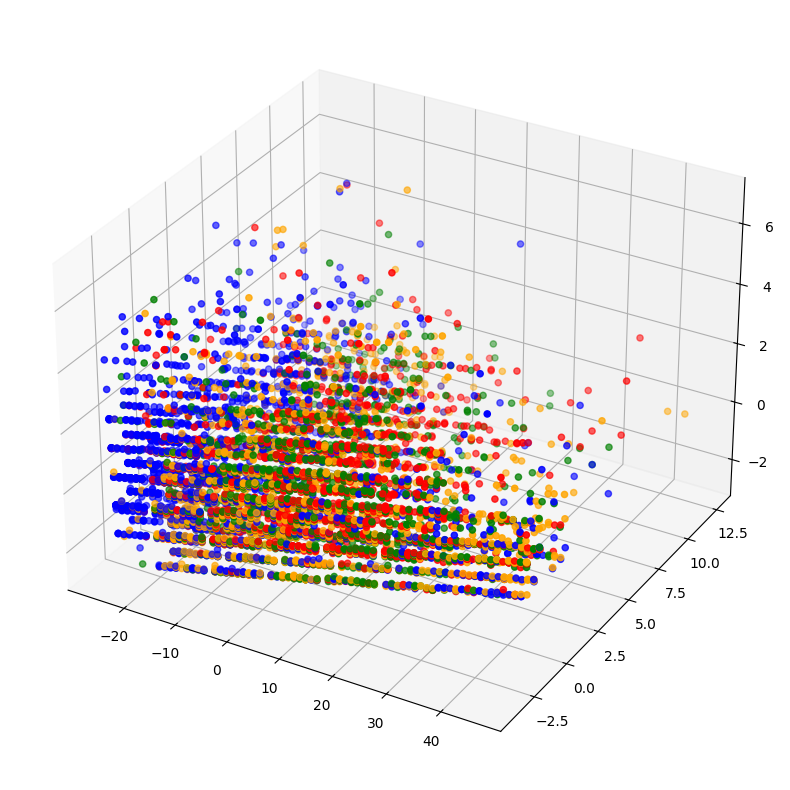

In [18]:
fig = plt.figure()
fig.set_size_inches(16, 10)
ax = plt.axes(projection='3d')
colors = PCA_dataset_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                            ['orange', 'green', 'red', 'blue'])
ax.scatter3D(PCA_dataset_3d['PCA_1'],
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'],
             c=colors)

### Построим модели по старым признакам и PCA компонентам

#### Построим модель по всем признакам

In [19]:

from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import datetime
pipe = Pipeline([('scaler', StandardScaler()),
                 ('classifier', OneVsRestClassifier(SGDClassifier(loss='log_loss')))])
begin_time = datetime.datetime.now()
pipe.fit(X, Y)
print(datetime.datetime.now() - begin_time)
print(pipe.score(X, Y))

0:00:00.248227
0.48896876549330687


#### Модель на 3-х PCA компонентах

In [20]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('one_vs_all', OneVsRestClassifier(SGDClassifier()))])
begin_time = datetime.datetime.now()
pipe.fit(PCA_dataset_3d.drop('SEGMENT', axis=1), Y)
print(datetime.datetime.now() - begin_time)
print(pipe.score(PCA_dataset_3d.drop('SEGMENT', axis=1), Y))

0:00:00.114474
0.34717402082300447


#### Замерим качество для разного набора компонент

In [25]:
score_dict = {}
time_dict = {}
for power in range(1, 15):
    pca_dataset = PCA(n_components=power).fit_transform(X)
    begin_time = datetime.datetime.now()
    pipe.fit(pca_dataset, Y)
    time_dict[power] = (datetime.datetime.now() - begin_time).microseconds
    score_dict[power] = pipe.score(pca_dataset, Y)

In [26]:
time_dict

{1: 233671,
 2: 190590,
 3: 439964,
 4: 511087,
 5: 480064,
 6: 658294,
 7: 465056,
 8: 345485,
 9: 316242,
 10: 367433,
 11: 252573,
 12: 241382,
 13: 253988,
 14: 253078}

In [27]:
score_dict

{1: 0.3464303420922162,
 2: 0.3740704015865146,
 3: 0.3713435795736242,
 4: 0.40233019335647,
 5: 0.40480912245909767,
 6: 0.4044372830937035,
 7: 0.4505453644025781,
 8: 0.4526524541398116,
 9: 0.4599652949925632,
 10: 0.4711204759543877,
 11: 0.466038671294001,
 12: 0.4510411502231036,
 13: 0.47620228061477443,
 14: 0.46938522558254836}

#### Обучающая кривая

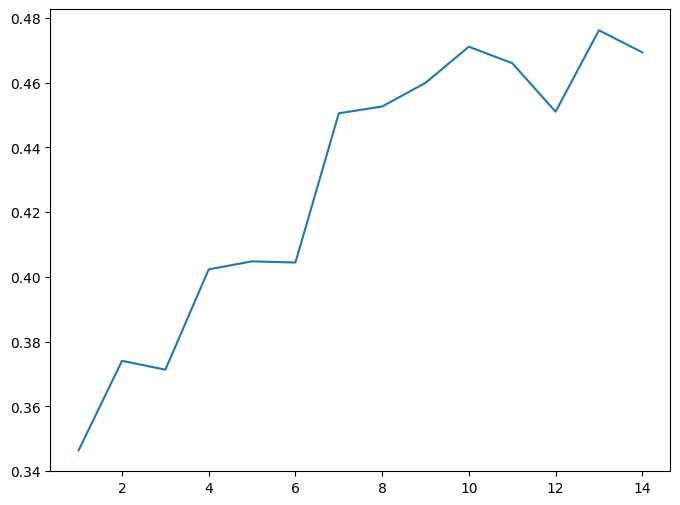

In [28]:
fig = plt.figure()
fig.set_size_inches(8, 6)
plt.plot(list(score_dict.keys()), list(score_dict.values()))
plt.show()

#### Кривая по времени

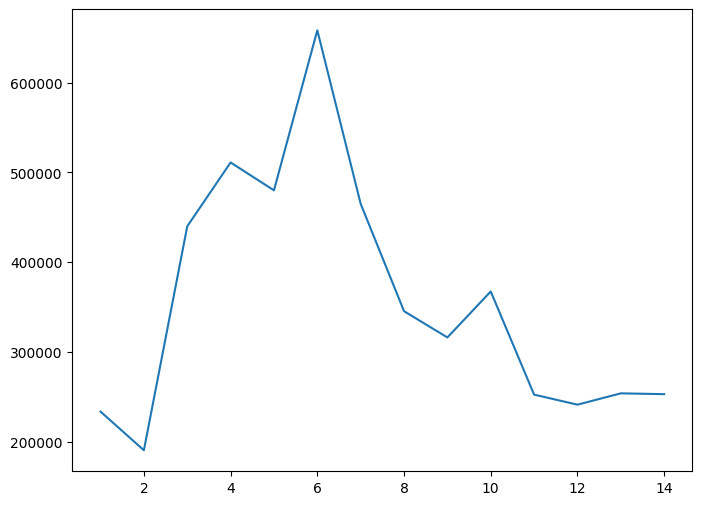

In [29]:
fig = plt.figure()
fig.set_size_inches(8, 6)
plt.plot(list(time_dict.keys()), list(time_dict.values()))
plt.show()